In [16]:
import numpy as np


class Perceptron:
    def __init__(self, eta= 0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, Y):
        
        # randomize initial weights
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size= 1 + X.shape[1])
        
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for i in range(X.shape[0]):
                updated = self.eta * (Y[i] - self.predict(X[i]))

                self.w_[1:] += updated * X[i]
                self.w_[0] += updated
                
                errors += int(updated != 0.0)
            
            self.errors_.append(errors)

        return self
            
            
        
    def predict(self, X):
        return np.where(np.dot(X, self.w_[1:]) + self.w_[0] >= 0.0, 1, -1)
    

y shape (100,)
X shape: (100, 2)
[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]]


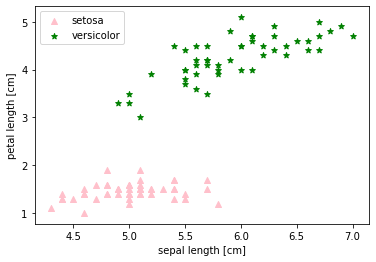

In [17]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

df.tail()

import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

print("y shape", y.shape)

X= df.iloc[:100, [0,2]].values

print("X shape:", X.shape)
print(X[0:5])

plt.scatter(X[:50, 0], X[:50, 1], color='pink', marker='^', label='setosa')
plt.scatter(X[50:, 0], X[50:, 1], color='green', marker='*', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

In [18]:
percept = Perceptron(eta=0.1, n_iter=20)

percept.fit(X,y)

print(percept.errors_)
print("len of errors:", len(percept.errors_))

[1, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
len of errors: 20


range(1, 21)


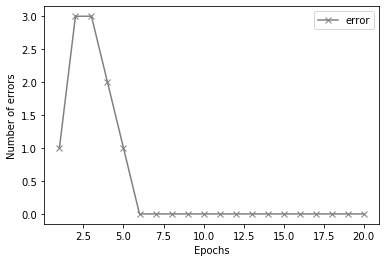

In [19]:
X_axis = range(1, len(percept.errors_) + 1)
print(X_axis)

plt.plot(X_axis, percept.errors_, color='grey', marker='x', label='error')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.legend(loc='upper right')
plt.show()